# Overview 
In this homework, we will review the derivation of the solution to the ordinary least squares equations for linear regression that we went over in the last lecture. This homework will be slightly different than previous homeworks, in that it is mostly reading and simple tests for reading comprehension. Don't be daunted by the length of this notebook;  there won't be much writing of code. We just want to expose you to these ideas again, in a slightly different way.

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import neurods
%matplotlib inline

We will simulate data the same way we did in class.

Our variable of interest is the amount of ice cream consume in a touristic village in one day (in arbitrary units).

We want to find a relationship between the amount of ice cream consumed and the temperature in that day (in celcius).

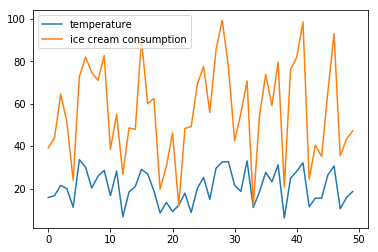

In [77]:
# We'll begin by simulating a few signals, this will help with the intuition for what regression means
# First, we'll create a random variable
noise_amp = 10
n_pts = 50
temperature = np.random.uniform(low = 5 ,high = 35,size = n_pts)

# Now, we'll define a "weight" w that causes a second variable to respond to it
weight = 2

# We will add a baseline w0:
w0 = 15

# Finally, we'll create some noise so that it's not a perfect mapping
noise = noise_amp * np.random.randn(n_pts)

# Then let's mix them together. In this case, b is explicitly created from the values in a
ice_cream_consumption = w0 + weight * temperature + noise

# Let's look at the signals
f, ax = plt.subplots()
ax.plot(temperature, label = 'temperature')
ax.plot(ice_cream_consumption, label = 'ice cream consumption')
ax.legend()

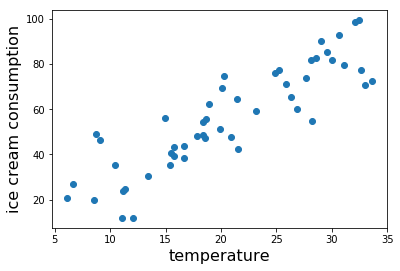

In [78]:
f, ax = plt.subplots()
ax.scatter(temperature, ice_cream_consumption)
plt.xlabel('temperature', fontsize = 16)
plt.ylabel('ice cream consumption', fontsize = 16 )

We assume that the ice cream consumption is a linear function of the temperature. That is, for a given day j, we have:

\begin{align}
\text{ice cream consumption}_\text{on day j} = \text{baseline level} + \text{scale} * \text{temperature}_\text{on day j} + \text{noise}_\text{on day j} 
\end{align}


Ice cream consumption is our output variable, and it is common to refer to it with $y$. The input variable is the temperature, and it is common to use $x$ for it. We call the baseline (or intercept term) $w_0$ and the scale $w$. Finally, it is common to refer to the noise term with $\epsilon$. We therefore have the following setup:

\begin{align}
y_j = w_0 + w x_j+ \epsilon_j
\end{align}

As we saw in class, finding the optimal $(w_0,w)$ setting is equivalent to finding a line that gives the best fit of the points in the above scatter plot. It is common to chose the line that minimizes the error between the true $y$ value associated with each $x$ and the value that this line defines as the corresponding output for $x$. In this homework we show how to find this line by minimizing the error. 

We can do this using already implemented algorithms such as `np.poly1d` for example. The line below is the line that minimizes the error.  

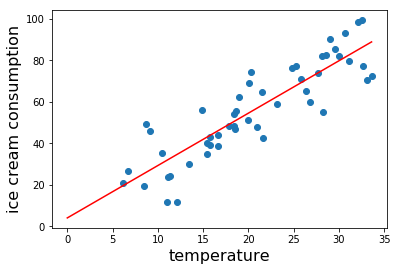

In [79]:
plt.scatter(temperature, ice_cream_consumption);
x_plot = [0,temperature.max()]
plt.plot(x_plot, np.poly1d(np.polyfit(temperature, ice_cream_consumption, 1))(x_plot),'r')
plt.xlabel('temperature', fontsize = 16)
plt.ylabel('ice cream consumption', fontsize = 16 )

But how is this solution derived? Remember, this is a simulated example in which we know what the true w0 and w should be. But what happens when we have real data?


Before we explore this further, let's take a detour to understand matrix multiplication.

https://upload.wikimedia.org/wikipedia/commons/thumb/e/eb/Matrix_multiplication_diagram_2.svg/626px-Matrix_multiplication_diagram_2.svg.png

### Matrix Multiplication:

A matrix multiplication is an operation on two matrices that produces a new matrix:


\begin{align}
{\bf AB} = {\bf C}
\end{align}

We can only multiply two matrices ${\bf A}$ and ${\bf B}$ if the number of columns of ${\bf A}$   is equal to the number of rows of ${\bf B}$. 

If ${\bf A}$ is $(r\times t)$ and ${\bf B}$ is $(t\times c)$, then ${\bf C}$ will be $(r\times c)$.

This is the elements of ${\bf C}$ are computed:
- the entry ${c}_{i,j}$, i.e. the entry on the $i$th row of ${C}$ and the $j$th column is computed by:
    - taking the $i$th row of the first matrix (A)
    - taking the $j$th column of the second matrix (B)
    - these two vectors will have the same lenght. Multiply their corresponding entries (i.e. the first element with the first element etc).
    - take the sum of the elementwise multiplication.

The picture below, taken from the wikipedia article on matrix multiplication, illustrates how to do this:

In [80]:
Image(url= "https://upload.wikimedia.org/wikipedia/commons/thumb/e/eb/Matrix_multiplication_diagram_2.svg/626px-Matrix_multiplication_diagram_2.svg.png")

NameError: name 'Image' is not defined

In that picture, we multiply a (3,2) matrix with a (2,3) matrix to get a (3,3) matrix.

The entry in the first row and the second column is equal to:
$$ a_{1,1}\times b_{1,2} + a_{1,2}\times b_{2,2}.$$

The entry in the third row and the third column is equal to:
$$ a_{3,1}\times b_{1,3} + a_{3,2}\times b_{2,3}.$$


If you want more information about matrix multiplication, you can see this video from the Khan academy, it even includes practice examples at the end: https://www.khanacademy.org/math/precalculus/precalc-matrices/multiplying-matrices-by-matrices/v/matrix-multiplication-intro

### 1- [1pt] If the multiplication is possible between the following matrices, report the size of the resulting matrix. Otherwise, specify that the multiplication is not possible:

In [ ]:
# 1-a
# Size of A is (2,4) and size of B is (4,5)
# What is the size of C = AB?
### STUDENT ANSWER


In [ ]:
# 1-b
# Size of A is (3,3) and size of B is (3,1)
# What is the size of C = AB?
### STUDENT ANSWER


In [ ]:
# 1-c
# Size of A is (4,3) and size of B is (4,3)
# What is the size of C = AB?
### STUDENT ANSWER


In [ ]:
# 1-d
# Size of A is (3,1) and size of B is (1,4)
# What is the size of C = AB?
### STUDENT ANSWER


### 2- [1pt] Report the entries in the product of the following matrices:

\begin{align}
\left[\begin{array}{c,c,c}
3 & -2 & 3 \\
9 & -1 & 4\\
2 & 4 & r \\ 
\end{array}\right]
\left[\begin{array}{c,c}
7 & -3  \\
s & 4 \\
1 & 2  \\ 
\end{array}\right]
= 
\left[\begin{array}{c,c}
c_{1,1} & c_{1,2} & c_{1,3} \\
c_{2,1} & c_{2,2} & c_{2,3}\\
c_{3,1} & c_{3,2} & c_{3,3}\\
\end{array}\right]
\end{align}

Write down the corresponding product in terms of r and s.

In [ ]:
# 2-a
# What is the value of c_{1,1}?
### STUDENT ANSWER


In [ ]:
# 2-b
# What is the value of c_{3,1}?
### STUDENT ANSWER


### 3- [1pt] Replace r by 2 and s by -5.  

- Use the function np.dot to print out the product of the two matrices above. 
- Then double check your answer to parts 2-a and 2-b when you use these values of r and s. Show that you get the same values.

In [ ]:
# Hint: use the following code to define the matrices. You should replace r and s by their values
# A = np.array( [ [3,-2,3], [9,-1,4], [2,4,r] ]  )
# B = np.array( [ [7,-3], [s,4], [1,2] ]  )
### STUDENT ANSWER


# Expressing our linear model as a matrix multiplication


Back to our model, the ice cream consumption on day $j$ is defined as:

\begin{align}
y_j = w_0 + w x_j+ \epsilon_j
\end{align}


We have n_tps = 50 datapoints. Let's represent all these datapoints together in one equation:
\begin{align}
\left[\begin{array}{c}
y_0 \\
y_1\\
y_2\\
\ldots \\ 
y_{49}\\
\end{array}\right]
= 
\left[\begin{array}{c,c}
1 & x_0 \\
1 & x_1\\
1 & x_2\\
\ldots & \ldots \\ 
1 & x_{49}\\
\end{array}\right]
\left[\begin{array}{c}
w_0 \\
w\\
\end{array}\right]
+
\left[\begin{array}{c}
\epsilon_0 \\
\epsilon_1\\
\epsilon_2\\
\ldots \\ 
\epsilon_{49}\\
\end{array}\right]
\end{align}

We can write the problem as:

\begin{align}
Y =  {\bf X} W +\epsilon
\end{align}

where
- $Y$ is n x 1
\begin{align}
 Y = \left[\begin{array}{c}
y_0 \\
y_1\\
y_2\\
\ldots \\ 
y_{299}\\
\end{array}\right]
\end{align}
- ${\bf X}$ is n x d, here d = 2

\begin{align}
 {\bf X} =  \left[\begin{array}{c,c}
1 & x_0 \\
1 & x_1\\
1 & x_2\\
\ldots & \ldots \\ 
1 & x_{299}\\
\end{array}\right]
\end{align}


- $W$ is d x 1

\begin{align}
 W =  
\left[\begin{array}{c}
w_0 \\
w\\
\end{array}\right]
\end{align}

- and $\epsilon$ is n x 1

\begin{align}
\epsilon = \left[\begin{array}{c}
\epsilon_0 \\
\epsilon_1\\
\epsilon_2\\
\ldots \\ 
\epsilon_{299}\\
\end{array}\right].
\end{align}

The notation we are following here is that:
- $a$ is a scalar
- $A$ is a vector
- ${\bf A}$ is a matrix.

### 4- [1pt] Explain in the cell below how the matrix operation above works. 

- Illustrate your explanation by showing how you can get the formulation of $y_5$ in terms of $x_5$ and $\epsilon_5$

In [ ]:
### STUDENT ANSWER



In our problem setup, we know $Y$ (the ice cream consumption)  and we know ${\bf X}$ (a column of ones and the temperature). We assume we don't know the parameters $W$ of our model. We are trying to find them.

Due to the noise, we cannot exactly recover $W$. However, we would like to find a solution $W^*$ that minimizes the following error as much as possible:

\begin{align}
error = \sum_{j = 1}^N (y_j - X_j W)^2 = ||Y - {\bf X} W||_2^2
\end{align}

This is the sum of squared errors. 

To minimize this equation with respect to $W$, we first need to find the derivative with respect to $W$:

\begin{align}
\frac{\delta \ error}{\delta W} &=& \frac{\delta ||Y - {\bf X} W||_2^2}{\delta W}\\
 &=& -2{\bf X}^\top (Y - {\bf X} W)\\
\end{align}

The above identity is derived using matrix calculus, which is outside the scope of this class.

The minimum is achieved when the derivative is zero:

\begin{align}
-2{\bf X}^\top (Y - {\bf X} \hat W^* ) &= 0\\
{\bf X}^\top (Y - {\bf X} \hat W^*) &= 0\\
{\bf X}^\top Y - {\bf X}^\top{\bf X}  W^* &= 0\\
{\bf X}^\top Y &= {\bf X}^\top{\bf X}  W^* \\
\end{align}

Matrix multiplication is commutative, meaning that ${\bf A B C = (AB)C = A(BC)}$.

We will therefore rewrite the ${\bf X}^\top{\bf X}  W$ term as $({\bf X}^\top{\bf X})  W^*$:


\begin{align}
{\bf X}^\top Y = ({\bf X}^\top{\bf X})  W^* \\
\end{align}


## Covariance matrix ${\bf X}^\top{\bf X}$

Let's investigate the $({\bf X}^\top{\bf X})$ term a little more. The product of the transpose of a matrix ${\bf X^\top}$ with that matrix ${\bf X}$ is called a covariance matrix. 


### 5- [1pt] If ${\bf X}$ is a (5, 3) matrix:
- what is the size of ${\bf X}^\top$?

Hint: Remember we have encountered matrix transposes multiple times in the course. To get the transpose of a matrix `X` in python, we used `X.T`.


In [ ]:
### STUDENT ANSWER


- what is the size of ${\bf X}^\top{\bf X}$?

In [ ]:
### STUDENT ANSWER


- if ${\bf X}$ is (n, d) is what is the size of ${\bf X}^\top{\bf X}$?

In [ ]:
### STUDENT ANSWER


$\Sigma = {\bf X}^\top{\bf X}$ is called the covariance matrix because it represents the covariance (= the amount of joint variance) between the columns of ${\bf X}$. 

The entry $\Sigma_{i,j}$ represents the covariance between the column $i$ and the column $j$ of ${\bf X}$. If $\Sigma_{i,j} = 0$, it means that the columns  $i$ and  $j$ are not correlated. 

The diagonal entries $\Sigma_{i,i}$ represent the variance of each column of ${\bf X}$ (i.e. the covariance of column $i$ with itself).

### Matrix inverse 


For the next step, we need some linear algebra knowledge. Basically the problem we have now is in the form:

\begin{align}
{\bf X}^\top Y &= ({\bf X}^\top{\bf X})  W^* \\
A &= {\bf B} W^* \\
\end{align}

Where $A = {\bf X}^\top Y$ and $ B = {\bf X}^\top{\bf X}$.

$A$ has dimension $(d\times n) \times (n \times 1) = (d \times 1)$. 

${\bf B}$ has dimension $(d\times n) \times (n \times d) = (d \times d)$. 

Let's compute $A$ and ${\bf B}$ for our example. First let's define ${\bf X}$ and $Y$:



In [ ]:
X = np.vstack([np.ones_like(temperature),temperature]).T
Y = ice_cream_consumption
Y = Y.reshape([Y.shape[0],1]) # this makes sure that the shape of Y is (50,1) and not (50)

### 6- [1pt] Compute the matrices $A$ and ${\bf B}$ and print them:

- Compute and print $A = {\bf X}^\top Y$ and $ B = {\bf X}^\top{\bf X}$.


In [ ]:
### STUDENT ANSWER


## Back to the derivation

We want to solve:

\begin{align}
A &= {\bf B} W^* \\
\end{align}

Let's step back for a moment. What would we have done if instead, we had a, b and w, all scalars, and we were solving:

\begin{align}
a = b  w \\
\end{align}

For example, we could have the following equation:

\begin{align}
6 = 3  w \\
\end{align}


then the solution would be: $w = \frac{6}{3} = 2$.

When dealing with matrices instead of scalars, the analogous operation is not as simple. Let's go back to our problem:

\begin{align}
A = {\bf B}  W^* \\
\end{align}

we need to somehow "divide" $A$ by ${\bf B}$. We will use the concept of matrix inversion to accomplish this. 

A square matrix is a matrix with an equal number of rows and columns. 

A square matrix ${\bf B}$ is invertable if there exist another matrix ${\bf C}$ such that ${\bf BC} = {\bf I_n}$,  where ${\bf  I_n}$ is the identity matrix of size $n\times n$.

An identity matrix is a square matrix where all the entries are zero, except the diagonal, which is equal to 1. Here is an example of an identity matrix ${\bf  I_n}$ with $ n = 3$:

In [ ]:
print(np.eye(3))

If a matrix ${\bf C}$ exists such that ${\bf BC} = {\bf I_n}$, we call ${\bf C}$ the inverse of ${\bf B}$, and we usually denote it as ${\bf B}^{-1}$: 

${\bf BB}^{-1} = {\bf I_n}$. 

In order for the matrix ${\bf B}^{-1}$ to exist, the matrix ${\bf B}$  need to satisfy some conditions. Usually, if a matrix has more rows than columns, then these conditions are usually satisfied when we take the covariance matrix. However, this is not always true. We will not go into the details of when a matrix is invertable in this homework. 

### 7 - [1pt] Multiply the matrix below with an identity matrix with n = 2:

\begin{align}
 {\bf D} =  \left[\begin{array}{c,c}
3 & -1 \\
2 & 1 \\
\end{array}\right]
\end{align}

I.e. find the entries in ${\bf F}$:
\begin{align}
 {\bf F} = {\bf D} {\bf  I} =  \left[\begin{array}{c,c}
3 & -1 \\
2 & 1 \\
\end{array}\right]
 \left[\begin{array}{c,c}
1 & 0 \\
0 & 1 \\
\end{array}\right]
= \left[\begin{array}{c,c}
f_{1,1} & f_{1,2} \\
f_{2,1} & f_{2,2} \\
\end{array}\right]
\end{align}


In [ ]:
### STUDENT ANSWER


### Deriving the OLS solution

Now we are able to proceed with the derivation, by multiplying both sides of the equation by the inverse of ${\bf X}^\top{\bf X}$:

\begin{align}
{\bf X}^\top Y &= ({\bf X}^\top{\bf X}) W \\
({\bf X}^\top{\bf X})^{-1} {\bf X}^\top Y &= ({\bf X}^\top{\bf X})^{-1} ({\bf X}^\top{\bf X}) W^*\\
\end{align}

We know that by definition: $({\bf X}^\top{\bf X})^{-1} ({\bf X}^\top{\bf X}) = {\bf I_n}$:


\begin{align}
({\bf X}^\top{\bf X})^{-1} {\bf X}^\top Y &= ({\bf X}^\top{\bf X})^{-1} ({\bf X}^\top{\bf X}) W^*\\
({\bf X}^\top{\bf X})^{-1}{\bf X}^\top Y &= {\bf I_n} W^* \\
({\bf X}^\top{\bf X})^{-1}{\bf X}^\top Y &= W^* \\
\end{align}


After all this work, $ W^* =  ({\bf X}^\top{\bf X})^{-1}{\bf X}^\top Y$ is the Ordinary Least Squares Solution, OLS solution for short. 


In the space below, we use the functions np.dot, .T and inv to implement the OLS solution. 

We then use it to obtain the $W^*$, the OLS solution. We print it and show the line corresponding to it.


In [ ]:
from numpy.linalg import inv

def my_OLS(X,Y):
    
    return np.dot( inv(np.dot(X.T,X)), np.dot(X.T, Y))

W_OLS = my_OLS(X,Y)

print('the slope is {} and the intercept is {}'.format(W_OLS[1], W_OLS[0]))
print('the real slope was 2 and the real intercept was 15.')

plt.scatter(temperature, ice_cream_consumption);
x_plot = [0,temperature.max()]
X_plot_mat = np.vstack([np.ones_like(x_plot),x_plot]).T
plt.plot(x_plot, np.dot(X_plot_mat,W_OLS),'r')
plt.xlabel('temperature', fontsize = 16)
plt.ylabel('ice cream consumption', fontsize = 16 )